In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
#Preprocessing the Training Set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [4]:
#Initialising CNN Model
cnn = tf.keras.models.Sequential()

#Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#Pooling 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Adding Second Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#Fully Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
#Compling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [6]:
#Training the CNN on Training Set and Evaluting it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
250/250 [==============================] - 18s 62ms/step - loss: 0.6707 - accuracy: 0.5694 - precision: 0.5643 - recall: 0.6090 - val_loss: 0.6482 - val_accuracy: 0.5885 - val_precision: 0.5537 - val_recall: 0.9120
Epoch 2/15
250/250 [==============================] - 15s 61ms/step - loss: 0.6009 - accuracy: 0.6743 - precision: 0.6814 - recall: 0.6545 - val_loss: 0.5587 - val_accuracy: 0.7175 - val_precision: 0.7066 - val_recall: 0.7440
Epoch 3/15
250/250 [==============================] - 15s 61ms/step - loss: 0.5637 - accuracy: 0.7114 - precision: 0.7186 - recall: 0.6948 - val_loss: 0.5295 - val_accuracy: 0.7470 - val_precision: 0.7225 - val_recall: 0.8020
Epoch 4/15
250/250 [==============================] - 15s 60ms/step - loss: 0.5363 - accuracy: 0.7279 - precision: 0.7403 - recall: 0.7020 - val_loss: 0.5041 - val_accuracy: 0.7540 - val_precision: 0.7708 - val_recall: 0.7230
Epoch 5/15
250/250 [==============================] - 15s 61ms/step - loss: 0.5053 - accuracy: 0

In [7]:
print("Training Accuracy : ",history.history['accuracy'][-1]*100)
print("Validation/Testing Accuracy : ",history.history['val_accuracy'][-1]*100)

Training Accuracy :  81.48750066757202
Validation/Testing Accuracy :  79.6999990940094


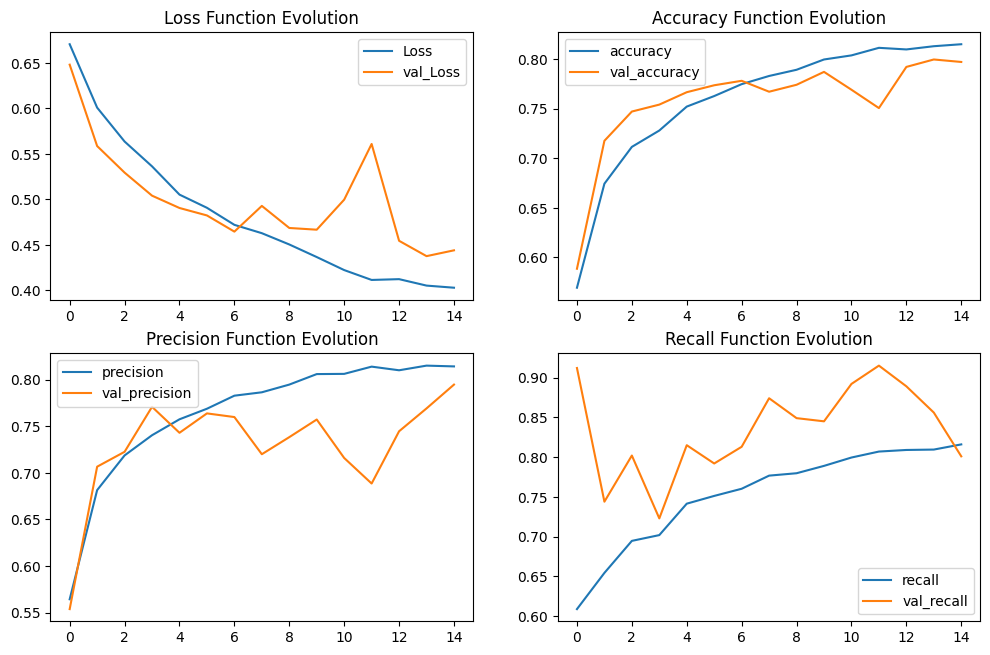

In [8]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

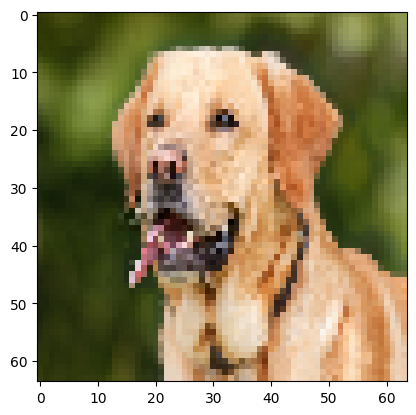

In [9]:
#Predicting a singleImage
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
plt.imshow(test_image)

In [10]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

dog


In [12]:
#for filters
for layer in cnn.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)


In [13]:
#Normalize filtres Values
filters1, biases1 = cnn.layers[0].get_weights()
filters2, biases2 = cnn.layers[2].get_weights()
#Scaling first filter values
f_min1, f_max1 = filters1.min(), filters1.max()
filters1 = (filters1 - f_min1) / (f_max1 - f_min1)
#Scaling Second filter Values
f_min2, f_max2 = filters2.min(), filters2.max()
filters2 = (filters2 - f_min2) / (f_max2 - f_min2)

Some of the First Convolution Layer Filters


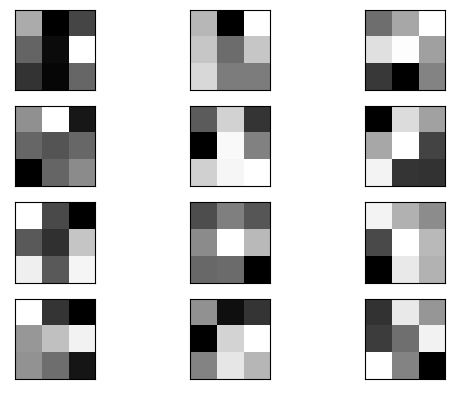

In [14]:
print('Some of the First Convolution Layer Filters')
#PLotting first Filter 
from matplotlib import pyplot 
n_filters, ix = 4, 1
for i in range(n_filters):
	# get the filter
	f = filters1[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Some of the Second Convolution Layer Filters


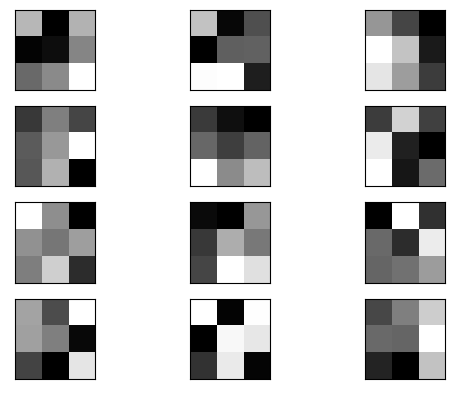

In [15]:
#Plotting Second Filter
print('Some of the Second Convolution Layer Filters')
n_filters, ix = 4, 1
for i in range(n_filters):
	# get the filter
	f = filters2[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()